In [1]:
using Pkg
Pkg.activate("./")
Pkg.instantiate()

  Activating project at `~/UCL/3x2_analytical`
┌ Warning: The project dependencies or compat requirements have changed since the manifest was last resolved.
│ It is recommended to `Pkg.resolve()` or consider `Pkg.update()` if necessary.
└ @ Pkg.API ~/.julia/juliaup/julia-1.9.4+0.x64.linux.gnu/share/julia/stdlib/v1.9/Pkg/src/API.jl:1725


In [2]:
using LinearAlgebra
using ForwardDiff
using Plots
using LimberJack
using CSV
using YAML
using NPZ
using PythonCall
sacc = pyimport("sacc");

# Data

In [3]:
sacc_path = "../../PhD/LimberJack.jl/data/FD/cls_FD_covG.fits"
yaml_path_wlwl = "data/DESY1/wlwl.yml"
nz_path = "data/DESY1/nzs/"
sacc_wlwl = sacc.Sacc().load_fits(sacc_path)
yaml_wlwl = YAML.load_file(yaml_path_wlwl)
nz_DESwl__0 = npzread(string(nz_path, "nz_DESwl__0.npz"))
nz_DESwl__1 = npzread(string(nz_path, "nz_DESwl__1.npz"))
nz_DESwl__2 = npzread(string(nz_path, "nz_DESwl__2.npz"))
nz_DESwl__3 = npzread(string(nz_path, "nz_DESwl__3.npz"))
meta_wlwl, files_wlwl = make_data(sacc_wlwl, yaml_wlwl;
                        nz_DESwl__0=nz_DESwl__0,
                        nz_DESwl__1=nz_DESwl__1,
                        nz_DESwl__2=nz_DESwl__2,
                        nz_DESwl__3=nz_DESwl__3);

DESwl__0 DESwl__0 24
DESwl__0 DESwl__1 24
DESwl__0 DESwl__2 24
DESwl__0 DESwl__3 24
DESwl__1 DESwl__1 24
DESwl__1 DESwl__2 24
DESwl__1 DESwl__3 24
DESwl__2 DESwl__2 24
DESwl__2 DESwl__3 24
DESwl__3 DESwl__3 24
using custom nz for nz_DESwl__0
using custom nz for nz_DESwl__1
using custom nz for nz_DESwl__2
using custom nz for nz_DESwl__3


In [4]:
sacc_path = "../../PhD/LimberJack.jl/data/FD/cls_FD_covG.fits"
yaml_path_gcgc = "data/DESY1/gcgc.yml"
nz_path = "data/DESY1/nzs/"
sacc_gcgc = sacc.Sacc().load_fits(sacc_path)
yaml_gcgc = YAML.load_file(yaml_path_gcgc)
nz_DESgc__0 = npzread(string(nz_path, "nz_DESgc__0.npz"))
nz_DESgc__1 = npzread(string(nz_path, "nz_DESgc__1.npz"))
nz_DESgc__2 = npzread(string(nz_path, "nz_DESgc__2.npz"))
nz_DESgc__3 = npzread(string(nz_path, "nz_DESgc__3.npz"))
nz_DESgc__4 = npzread(string(nz_path, "nz_DESgc__4.npz"))
meta_gcgc, files_gcgc = make_data(sacc_gcgc, yaml_gcgc;
                                  nz_DESgc__0=nz_DESgc__0,
                                  nz_DESgc__1=nz_DESgc__1,
                                  nz_DESgc__2=nz_DESgc__2,
                                  nz_DESgc__3=nz_DESgc__3,
                                  nz_DESgc__4=nz_DESgc__4);

DESgc__0 DESgc__0 5
DESgc__1 DESgc__1 8
DESgc__2 DESgc__2 10
DESgc__3 DESgc__3 11
DESgc__4 DESgc__4 13
using custom nz for nz_DESgc__0
using custom nz for nz_DESgc__1
using custom nz for nz_DESgc__2
using custom nz for nz_DESgc__3
using custom nz for nz_DESgc__4


In [5]:
sacc_path = "../../PhD/LimberJack.jl/data/FD/cls_FD_covG.fits"
yaml_path_3x2 = "data/DESY1/gcgc_gcwl_wlwl.yml"
sacc_3x2 = sacc.Sacc().load_fits(sacc_path)
yaml_3x2 = YAML.load_file(yaml_path_3x2)
#nz_DESwl__0 = npzread(string(nz_path, "nz_DESwl__0.npz"))
#nz_DESwl__1 = npzread(string(nz_path, "nz_DESwl__1.npz"))
#nz_DESwl__2 = npzread(string(nz_path, "nz_DESwl__2.npz"))
#nz_DESwl__3 = npzread(string(nz_path, "nz_DESwl__3.npz"))
#nz_DESgc__0 = npzread(string(nz_path, "nz_DESgc__0.npz"))
#nz_DESgc__1 = npzread(string(nz_path, "nz_DESgc__1.npz"))
#nz_DESgc__2 = npzread(string(nz_path, "nz_DESgc__2.npz"))
#nz_DESgc__3 = npzread(string(nz_path, "nz_DESgc__3.npz"))
#nz_DESgc__4 = npzread(string(nz_path, "nz_DESgc__4.npz"))
meta_3x2, files_3x2 = make_data(sacc_3x2, yaml_3x2,
                                nz_DESwl__0=nz_DESwl__0,
                                nz_DESwl__1=nz_DESwl__1,
                                nz_DESwl__2=nz_DESwl__2,
                                nz_DESwl__3=nz_DESwl__3,
                                nz_DESgc__0=nz_DESgc__0,
                                nz_DESgc__1=nz_DESgc__1,
                                nz_DESgc__2=nz_DESgc__2,
                                nz_DESgc__3=nz_DESgc__3,
                                nz_DESgc__4=nz_DESgc__4);

DESgc__0 DESgc__0 5
DESgc__1 DESgc__1 8
DESgc__2 DESgc__2 10
DESgc__3 DESgc__3 11
DESgc__4 DESgc__4 13
DESgc__0 DESwl__0 5
DESgc__0 DESwl__1 5
DESgc__0 DESwl__2 5
DESgc__0 DESwl__3 5
DESgc__1 DESwl__0 8
DESgc__1 DESwl__1 8
DESgc__1 DESwl__2 8
DESgc__1 DESwl__3 8
DESgc__2 DESwl__0 10
DESgc__2 DESwl__1 10
DESgc__2 DESwl__2 10
DESgc__2 DESwl__3 10
DESgc__3 DESwl__0 11
DESgc__3 DESwl__1 11
DESgc__3 DESwl__2 11
DESgc__3 DESwl__3 11
DESgc__4 DESwl__0 13
DESgc__4 DESwl__1 13
DESgc__4 DESwl__2 13
DESgc__4 DESwl__3 13
DESwl__0 DESwl__0 24
DESwl__0 DESwl__1 24
DESwl__0 DESwl__2 24
DESwl__0 DESwl__3 24
DESwl__1 DESwl__1 24
DESwl__1 DESwl__2 24
DESwl__1 DESwl__3 24
DESwl__2 DESwl__2 24
DESwl__2 DESwl__3 24
DESwl__3 DESwl__3 24
using custom nz for nz_DESgc__0
using custom nz for nz_DESgc__1
using custom nz for nz_DESgc__2
using custom nz for nz_DESgc__3
using custom nz for nz_DESgc__4
using custom nz for nz_DESwl__0
using custom nz for nz_DESwl__1
using custom nz for nz_DESwl__2
using custom nz for

# Make Nzs

In [ ]:
using Distributions, Random, Interpolations, LinearAlgebra

In [ ]:
nz_DESgc__0 = files_gcgc["nz_DESgc__0"]
nz_DESgc__1 = files_gcgc["nz_DESgc__1"]
nz_DESgc__2 = files_gcgc["nz_DESgc__2"]
nz_DESgc__3 = files_gcgc["nz_DESgc__3"]
nz_DESgc__4 = files_gcgc["nz_DESgc__4"];

In [ ]:
nzi_DESgc__0 = LinearInterpolation(nz_DESgc__0[1], nz_DESgc__0[2]/sum(nz_DESgc__0[2]), extrapolation_bc=Line())
nzi_DESgc__1 = LinearInterpolation(nz_DESgc__1[1], nz_DESgc__1[2]/sum(nz_DESgc__1[2]), extrapolation_bc=Line())
nzi_DESgc__2 = LinearInterpolation(nz_DESgc__2[1], nz_DESgc__2[2]/sum(nz_DESgc__2[2]), extrapolation_bc=Line())
nzi_DESgc__3 = LinearInterpolation(nz_DESgc__3[1], nz_DESgc__3[2]/sum(nz_DESgc__3[2]), extrapolation_bc=Line())
nzi_DESgc__4 = LinearInterpolation(nz_DESgc__4[1], nz_DESgc__4[2]/sum(nz_DESgc__4[2]), extrapolation_bc=Line());

In [ ]:
zs_DESgc__0 = LinRange(0.1, 0.4, 40)
zs_DESgc__1 = LinRange(0.15, 0.6, 40)
zs_DESgc__2 = LinRange(0.3, 0.75, 40)
zs_DESgc__3 = LinRange(0.45, 0.9, 40)
zs_DESgc__4 = LinRange(0.6, 1.05, 40);

In [ ]:
dndz_DESgc__0 = nzi_DESgc__0(zs_DESgc__0)
dndz_DESgc__1 = nzi_DESgc__1(zs_DESgc__1)
dndz_DESgc__2 = nzi_DESgc__2(zs_DESgc__2)
dndz_DESgc__3 = nzi_DESgc__3(zs_DESgc__3)
dndz_DESgc__4 = nzi_DESgc__4(zs_DESgc__4);

In [ ]:
err_DESgc__0 = (0.35 .* dndz_DESgc__0)
err_DESgc__1 = (0.35 .* dndz_DESgc__1)
err_DESgc__2 = (0.35 .* dndz_DESgc__2)
err_DESgc__3 = (0.35 .* dndz_DESgc__3)
err_DESgc__4 = (0.35 .* dndz_DESgc__4)

cov_DESgc__0 = Diagonal(err_DESgc__0 .^ 2)
cov_DESgc__1 = Diagonal(err_DESgc__1 .^ 2)
cov_DESgc__2 = Diagonal(err_DESgc__2 .^ 2)
cov_DESgc__3 = Diagonal(err_DESgc__3 .^ 2)
cov_DESgc__4 = Diagonal(err_DESgc__4 .^ 2);

In [ ]:

plot(zs_DESgc__0, dndz_DESgc__0, yerr=err_DESgc__0, label="DESgc__0")
plot!(zs_DESgc__1, dndz_DESgc__1, yerr=err_DESgc__1, label="DESgc__1")
plot!(zs_DESgc__2, dndz_DESgc__2, yerr=err_DESgc__2, label="DESgc__2")
plot!(zs_DESgc__3, dndz_DESgc__3, yerr=err_DESgc__3, label="DESgc__3")
plot!(zs_DESgc__4, dndz_DESgc__4, yerr=err_DESgc__4, label="DESgc__4")

In [ ]:
npzwrite("data/DESY1/nzs/nz_DESgc__0.npz", Dict("z" => zs_DESgc__0, "dndz" => dndz_DESgc__0, "cov" => cov_DESgc__0))
npzwrite("data/DESY1/nzs/nz_DESgc__1.npz", Dict("z" => zs_DESgc__1, "dndz" => dndz_DESgc__1, "cov" => cov_DESgc__1))
npzwrite("data/DESY1/nzs/nz_DESgc__2.npz", Dict("z" => zs_DESgc__2, "dndz" => dndz_DESgc__2, "cov" => cov_DESgc__2))
npzwrite("data/DESY1/nzs/nz_DESgc__3.npz", Dict("z" => zs_DESgc__3, "dndz" => dndz_DESgc__3, "cov" => cov_DESgc__3))
npzwrite("data/DESY1/nzs/nz_DESgc__4.npz", Dict("z" => zs_DESgc__4, "dndz" => dndz_DESgc__4, "cov" => cov_DESgc__4))

# Make TPT's

In [6]:
nzs_wl = [
    nz_DESwl__0["dndz"];
    nz_DESwl__1["dndz"];
    nz_DESwl__2["dndz"];
    nz_DESwl__3["dndz"]]
nzs_gc = [
    nz_DESgc__0["dndz"];
    nz_DESgc__1["dndz"]; 
    nz_DESgc__2["dndz"];
    nz_DESgc__3["dndz"];
    nz_DESgc__4["dndz"]]
nzs_3x2 = [
    nz_DESwl__0["dndz"];
    nz_DESwl__1["dndz"];
    nz_DESwl__2["dndz"];
    nz_DESwl__3["dndz"];
    nz_DESgc__0["dndz"];
    nz_DESgc__1["dndz"];
    nz_DESgc__2["dndz"];
    nz_DESgc__3["dndz"];
    nz_DESgc__4["dndz"]];

In [7]:
nz_covs_wl = zeros(40*4, 40*4)
nz_covs_wl[(1-1)*40+1:1*40, (1-1)*40+1:1*40] .= nz_DESwl__0["cov"]
nz_covs_wl[(2-1)*40+1:2*40, (2-1)*40+1:2*40] .= nz_DESwl__1["cov"]
nz_covs_wl[(3-1)*40+1:3*40, (3-1)*40+1:3*40] .= nz_DESwl__2["cov"]
nz_covs_wl[(4-1)*40+1:4*40, (4-1)*40+1:4*40] .= nz_DESwl__3["cov"]

nz_covs_gc = zeros(40*5, 40*5)
nz_covs_gc[(1-1)*40+1:1*40, (1-1)*40+1:1*40] .= nz_DESgc__0["cov"]
nz_covs_gc[(2-1)*40+1:2*40, (2-1)*40+1:2*40] .= nz_DESgc__1["cov"]
nz_covs_gc[(3-1)*40+1:3*40, (3-1)*40+1:3*40] .= nz_DESgc__2["cov"]
nz_covs_gc[(4-1)*40+1:4*40, (4-1)*40+1:4*40] .= nz_DESgc__3["cov"]
nz_covs_gc[(5-1)*40+1:5*40, (5-1)*40+1:5*40] .= nz_DESgc__4["cov"]

nz_covs_3x2 = zeros(40*9, 40*9)
nz_covs_3x2[(1-1)*40+1:1*40, (1-1)*40+1:1*40] .= nz_DESwl__0["cov"]
nz_covs_3x2[(2-1)*40+1:2*40, (2-1)*40+1:2*40] .= nz_DESwl__1["cov"]
nz_covs_3x2[(3-1)*40+1:3*40, (3-1)*40+1:3*40] .= nz_DESwl__2["cov"]
nz_covs_3x2[(4-1)*40+1:4*40, (4-1)*40+1:4*40] .= nz_DESwl__3["cov"]
nz_covs_3x2[(5-1)*40+1:5*40, (5-1)*40+1:5*40] .= nz_DESgc__0["cov"]
nz_covs_3x2[(6-1)*40+1:6*40, (6-1)*40+1:6*40] .= nz_DESgc__1["cov"]
nz_covs_3x2[(7-1)*40+1:7*40, (7-1)*40+1:7*40] .= nz_DESgc__2["cov"]
nz_covs_3x2[(8-1)*40+1:8*40, (8-1)*40+1:8*40] .= nz_DESgc__3["cov"]
nz_covs_3x2[(9-1)*40+1:9*40, (9-1)*40+1:9*40] .= nz_DESgc__4["cov"];

In [8]:
nzs_wl[41:80]

40-element Vector{Float64}:
 0.0021217298248247464
 0.015483203477098792
 0.011015723271678914
 0.014919979709700118
 0.04613032739962635
 0.0407475343293681
 0.04432755736318987
 0.08383403347728186
 0.07950567003718309
 0.06363722261531396
 0.06216337929065077
 0.08996561071821912
 0.09157235508793568
 ⋮
 0.001352573599099583
 0.0015659858608288936
 0.001147116466354769
 0.0005511453984786999
 0.0008369173167671036
 0.0007083165712281153
 0.00040746254348850933
 0.0021696588419029186
 0.0005990022826835282
 0.0002414017375227488
 0.0002549410334274651
 0.0005860094940003479

In [9]:
function model_wl(nzs, meta=meta_wlwl, files=files_wlwl)
    cosmo = Cosmology(Ωm=0.3, Ωb=0.05, h=0.67, σ8=0.81, ns=0.96,
        tk_mode=:EisHu, pk_mode=:Halofit)
    nuisances = Dict(
        "DESgc__0_b" => 1.484,
        "DESgc__1_b" => 1.805,
        "DESgc__2_b" => 1.776,
        "DESgc__3_b" => 2.168,
        "DESgc__4_b" => 2.23, 
        "DESwl__0_nz" => nzs[1:40],
        "DESwl__1_nz" => nzs[41:80],
        "DESwl__2_nz" => nzs[81:120],
        "DESwl__3_nz" => nzs[121:160],
        "DESwl__0_m" => 0.018,
        "DESwl__1_m" => 0.014,
        "DESwl__2_m" => 0.01,
        "DESwl__3_m" => 0.004,
        "A_IA" => 0.294,
        "alpha_IA" => 0.378)
    cosmo.settings.cosmo_type = eltype(valtype(nzs)) 
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end

function model_gc(nzs, meta=meta_gcgc, files=files_gcgc)
    cosmo = Cosmology(Ωm=0.3, Ωb=0.05, h=0.67, σ8=0.81, ns=0.96,
        tk_mode=:EisHu, pk_mode=:Halofit)
    nuisances = Dict(
        "DESgc__0_b" => 1.484,
        "DESgc__1_b" => 1.805,
        "DESgc__2_b" => 1.776,
        "DESgc__3_b" => 2.168,
        "DESgc__4_b" => 2.23, 
        "DESgc__0_nz" => nzs[1:40],
        "DESgc__1_nz" => nzs[41:80],
        "DESgc__2_nz" => nzs[81:120],
        "DESgc__3_nz" => nzs[121:160],
        "DESgc__4_nz" => nzs[161:200],
        "DESwl__0_m" => 0.018,
        "DESwl__1_m" => 0.014,
        "DESwl__2_m" => 0.01,
        "DESwl__3_m" => 0.004,
        "A_IA" => 0.294,
        "alpha_IA" => 0.378)
    cosmo.settings.cosmo_type = eltype(valtype(nzs)) 
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end


function model_3x2(nzs, meta=meta_3x2, files=files_3x2)
    cosmo = Cosmology(Ωm=0.3, Ωb=0.05, h=0.67, σ8=0.81, ns=0.96,
        tk_mode=:EisHu, pk_mode=:Halofit)
    nuisances = Dict(
        "DESgc__0_b" => 1.484,
        "DESgc__1_b" => 1.805,
        "DESgc__2_b" => 1.776,
        "DESgc__3_b" => 2.168,
        "DESgc__4_b" => 2.23,
        "DESwl__0_nz" => nzs[1:40],
        "DESwl__1_nz" => nzs[41:80],
        "DESwl__2_nz" => nzs[81:120],
        "DESwl__3_nz" => nzs[121:160],
        "DESgc__0_nz" => nzs[161:200],
        "DESgc__1_nz" => nzs[201:240],
        "DESgc__2_nz" => nzs[241:280],
        "DESgc__3_nz" => nzs[281:320],
        "DESgc__4_nz" => nzs[321:360],
        "DESwl__0_m" => 0.018,
        "DESwl__1_m" => 0.014,
        "DESwl__2_m" => 0.01,
        "DESwl__3_m" => 0.004,
        "A_IA" => 0.294,
        "alpha_IA" => 0.378)
    cosmo.settings.cosmo_type = eltype(valtype(nzs)) 
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end

model_3x2 (generic function with 3 methods)

In [42]:
function make_Cmod(nzs, nzs_covs, data_cov, model; mode="AD")
    m = size(nzs_covs)[1]
    n_cls = size(data_cov)[1]

    if mode == "AD"
        println("Using automatic differentiation to compute T")
        T = zeros(n_cls, m)
        T = ForwardDiff.jacobian(model, nzs)
    end
    
    if mode == "FD"
        println("Using finite differences to compute T")
        T = zeros(n_cls, m)
        d = 0.01
        for i in 1:m
            e = zeros(m)
            e[i] = d
            T[:, i] = (model(nzs.+e) .- model(nzs.-e)) ./ (2*d)
        end
    end

    TPT = T * nzs_covs * T'
    Cmod = Symmetric(data_cov + TPT)
    return Cmod
end

make_Cmod (generic function with 1 method)

## WLWL

In [43]:
Cmod_wlwl_FD = make_Cmod(nzs_wl, nz_covs_wl, meta_wlwl.cov, model_wl; mode="FD")
Cmod_wlwl_AD = make_Cmod(nzs_wl, nz_covs_wl, meta_wlwl.cov, model_wl; mode="AD")

Using finite differences to compute T
Using automatic differentiation to compute T


240×240 Symmetric{Float64, Matrix{Float64}}:
  1.53422e-18  -5.99761e-20   2.73247e-20  …  -8.13685e-24  -7.39618e-24
 -5.99761e-20   5.36336e-19  -2.79484e-20     -1.79796e-24  -1.88294e-24
  2.73247e-20  -2.79484e-20   3.08996e-19     -8.56731e-25  -8.93461e-25
  1.46699e-20   1.0185e-20   -1.991e-20       -4.3922e-25   -4.57366e-25
  1.16985e-20   5.71794e-21   5.06676e-21     -2.58236e-25  -2.74889e-25
  9.43308e-21   4.88483e-21   2.79316e-21  …  -1.66529e-25  -1.8202e-25
  8.01856e-21   4.149e-21     2.5884e-21      -1.12535e-25  -1.27489e-25
  6.90339e-21   3.57681e-21   2.26615e-21     -7.88128e-26  -9.25381e-26
  6.00162e-21   3.10991e-21   1.97126e-21     -5.62207e-26  -6.64e-26
  5.20989e-21   2.69917e-21   1.7228e-21      -4.44747e-26  -4.27483e-26
  4.54534e-21   2.35582e-21   1.50304e-21  …  -3.19482e-26  -2.94555e-26
  3.97381e-21   2.06038e-21   1.31897e-21     -2.21107e-26  -2.01397e-26
  3.46459e-21   1.79671e-21   1.1515e-21      -1.4983e-26   -1.32242e-26
  ⋮       

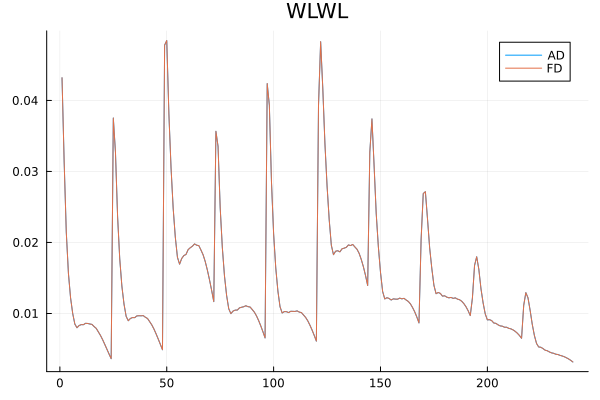

In [44]:
plot(abs.(diag(meta_wlwl.cov) .- diag(Cmod_wlwl_AD)) ./ diag(meta_wlwl.cov), label="AD", title="WLWL")
plot!(abs.(diag(meta_wlwl.cov) .- diag(Cmod_wlwl_FD)) ./ diag(meta_wlwl.cov), label="FD", title="WLWL")

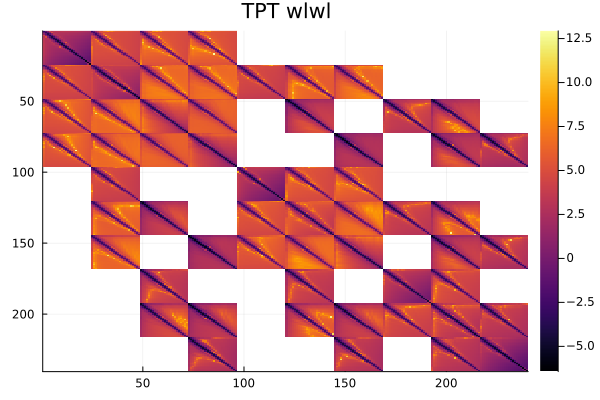

In [45]:
heatmap(log.(abs.((Cmod_wlwl_AD .- meta_wlwl.cov)./ meta_wlwl.cov)), title="TPT wlwl", yflip=true)

In [46]:
npzwrite("covs/dz_wlwl_covs.npz",
        Dict(
        "wlwl_AD" => Cmod_wlwl_AD,
        "wlwl_FD" => Cmod_wlwl_FD))

## GCGC

In [47]:
Cmod_gcgc_FD = make_Cmod(nzs_gc, nz_covs_gc, meta_gcgc.cov, model_gc; mode="FD")
Cmod_gcgc_AD = make_Cmod(nzs_gc, nz_covs_gc, meta_gcgc.cov, model_gc; mode="AD")

Using finite differences to compute T
Using automatic differentiation to compute T


47×47 Symmetric{Float64, Matrix{Float64}}:
  3.5655e-9    -2.45363e-10   1.65261e-11  …  -1.87662e-32  -1.98597e-32
 -2.45363e-10   2.56722e-10  -1.46684e-11     -4.81004e-31  -4.50105e-31
  1.65261e-11  -1.46684e-11   4.59922e-11     -6.62644e-30  -5.57972e-30
 -1.32529e-12   3.18762e-12  -2.35862e-12      2.297e-30     1.7355e-30
  2.20204e-12   1.44597e-12   8.92399e-13      2.08106e-30   1.86978e-30
  2.01833e-11  -1.49487e-12   3.77291e-14  …  -3.58921e-31  -1.68264e-31
 -1.49487e-12   1.90349e-12  -1.4405e-13      -1.86466e-30  -5.14008e-31
  3.77291e-14  -1.4405e-13    3.66309e-13     -4.78034e-30  -3.86025e-30
 -3.9064e-14    2.45717e-15  -3.01034e-14      2.28857e-30   2.45617e-30
 -1.24511e-14  -4.81249e-15   1.87693e-16      6.42016e-30   3.31707e-30
 -8.505e-15    -1.80644e-15  -1.09959e-15  …   4.94903e-30   4.03354e-30
 -5.64903e-15  -1.17089e-15  -4.62843e-16     -1.95881e-30   1.00323e-30
 -3.29647e-15  -8.86067e-16  -3.13327e-16     -1.01577e-30   2.27371e-30
  ⋮      

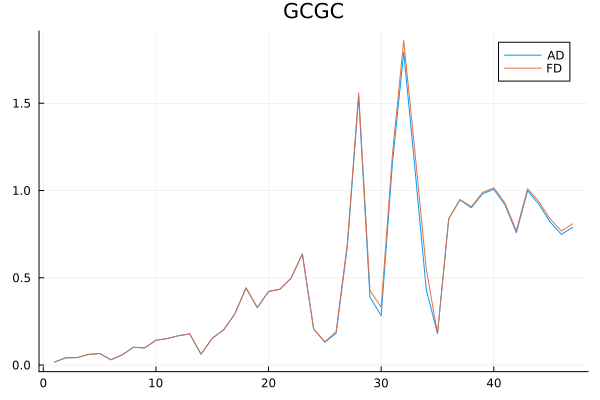

In [48]:
plot(abs.(diag(meta_gcgc.cov) .- diag(Cmod_gcgc_AD)) ./ diag(meta_gcgc.cov), label="AD", title="GCGC")
plot!(abs.(diag(meta_gcgc.cov) .- diag(Cmod_gcgc_FD)) ./ diag(meta_gcgc.cov), label="FD")

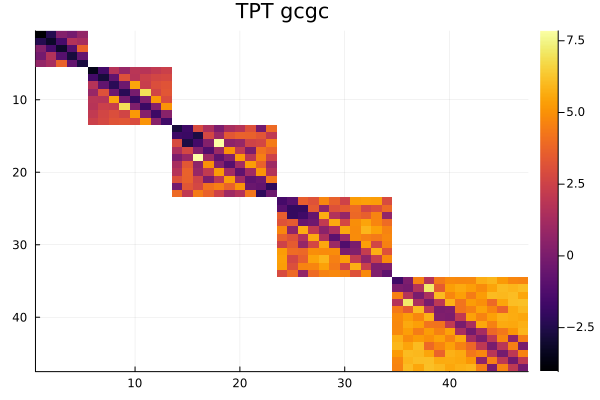

In [18]:
heatmap(log.(abs.((Cmod_gcgc_AD .- meta_gcgc.cov)./ meta_gcgc.cov)), title="TPT gcgc", yflip=true)

In [19]:
npzwrite("covs/dz_wlwl_covs.npz",
        Dict(
        "gcgc_AD" => Cmod_gcgc_AD,
        "gcgc_FD" => Cmod_gcgc_FD))

## 3x2

In [ ]:
Cmod_3x2_FD = make_Cmod(dz_cov_3x2, meta_3x2.cov, model_3x2; mode="FD");
Cmod_3x2_AD = make_Cmod(dz_cov_3x2, meta_3x2.cov, model_3x2; mode="AD");

In [ ]:
plot(abs.(diag(meta_3x2.cov) .- diag(Cmod_3x2_FD)) ./ diag(meta_3x2.cov), label="FD", title="3x2")
plot!(abs.(diag(meta_3x2.cov) .- diag(Cmod_3x2_AD)) ./ diag(meta_3x2.cov), label="AD")

In [ ]:
heatmap(log.(abs.((Cmod_3x2_AD .- meta_3x2.cov)./ meta_3x2.cov)), title="TPT 3x2", yflip=true)

In [ ]:
npzwrite("covs/dz_covs.npz",
        Dict(
        "3x2_AD" => Cmod_3x2_AD,
        "3x2_FD" => Cmod_3x2_FD))

## Save

In [ ]:
using NPZ
npzwrite("covs/dz_covs.npz",
        Dict(
        "wlwl_AD" => Cmod_wlwl_AD,
        "wlwl_FD" => Cmod_wlwl_FD,
        "gcgc_AD" => Cmod_gcgc_AD,
        "gcgc_FD" => Cmod_gcgc_FD,
        "3x2_AD" => Cmod_3x2_AD,
        "3x2_FD" => Cmod_3x2_FD))